# (자료) 데이터생성 – 성별,몸무게 –\> 키

신록예찬  
2023-11-09

`-` imports

In [10]:
import numpy as np
import pandas as pd
import sklearn.model_selection
import seaborn as sns

`-` 결측이 있는 자료

In [11]:
np.random.seed(42)
data = np.array(['male'] * 500 + ['female'] * 500)
def sample_data(data, male_prob, female_prob, size):
    male_sample = np.random.choice(data[data=='male'], size=int(size * male_prob))
    female_sample = np.random.choice(data[data=='female'], size=int(size * female_prob))
    return np.concatenate([male_sample, female_sample])
train = sample_data(data, 0.8, 0.2, 280)
test = sample_data(data, 0.2, 0.8, 120)
np.random.shuffle(train)
np.random.shuffle(test)
sex = np.concatenate([train,test])
weight = np.random.randn(400)*7
height = np.random.randn(400)*3
for i,s in enumerate(sex):
    if s =='male':
        weight[i] = 75+weight[i]
        height[i] = height[i]+0.8*weight[i]+120
    else:
        weight[i] = 50+weight[i]*0.6
        height[i] = height[i]+1.3*weight[i]+100
df = pd.DataFrame({'weight':weight,'sex':sex,'height':height})
missing_ratio = 0.2
num_missing = int(len(df) * missing_ratio)
missing_indices = np.random.choice(df.index, size=num_missing, replace=False)
df.loc[missing_indices, 'weight'] = np.nan
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=120)

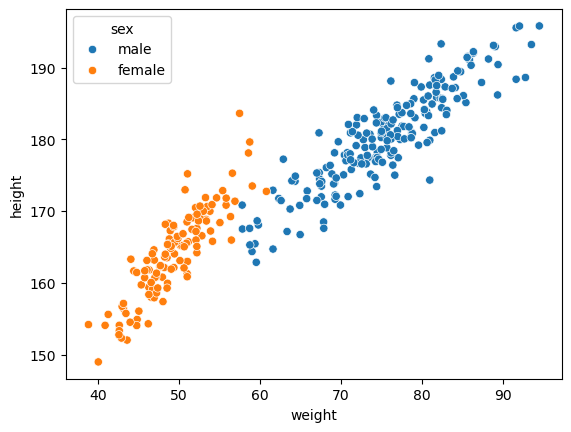

In [9]:
sns.scatterplot(df, x='weight', y='height', hue='sex')

자료특징

1.  결측값이 있다.
2.  `tr`에는 남자가, `test`에는 여자가 많다.
3.  남녀의 (몸무게,키)의 분포는 서로 다르다.